# Project: Investigate a TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> I have selected the TMDb movie dataset to complete the exploratory data analysis.This dataset consists of data of around 10 thousand movies. It contains 21 attributes or columns describing the title, budget, revenue, release_year, cast, etc. In this section of the report, I am importing pandas, numpy, matplotlib and seaborn libraries for further analysis and visualization.
**Assumption : The runtime of each movie is in minutes and the revenue, budget of each movie is in USD.**

### Research Questions for Exploratory Data Analysis
>1. What is the total of minimum number of movies and maximum number of movies released in a year?
>2. What is the average runtime of the movies released in the year 2011?
>3. How does the runtime of a movie impacts on the profits earned by the movie?
>4. Which top 5 genres have the maximum count of movies?
>5. Which movie(s) directed by Steven Spielberg failed in terms of profit?
>6. What is the yearly distribution of average revenue generated?

### Attributes/ Columns used for Exploratory Data Analysis
> budget, revenue, release_year, genre, director, runtime

In [47]:
# Import statements for all of the packages that will be used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I have loaded the dataset into the pandas dataframe and performed a few operations to get a better idea about the attributes and their values.

In [48]:
#Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')

In [49]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [50]:
df.shape

(10866, 21)

In [51]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [53]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 
> In this part, I have cleaned the dataset by removing the duplicate rows, dropping the columns which aren't necessary for data analysis, modifying the datatype as per the requirement and replacing zero with NAN and removing tupples that do not contain significant data. The dataset obtained after these operations is clean, uniform and doesn't contain any repititive or unwanted values. 

In [54]:
#To find duplicate rows in the dataset and drop them from the dataset.

df.duplicated().sum()

1

In [55]:
df.drop_duplicates(keep='first',inplace=True)

In [56]:
df.duplicated().sum()

0

In [57]:
#To drop those columns from the dataset which won't largely contribute to the exploratory data analysis.

df.drop(['popularity','keywords','homepage','tagline','overview','production_companies','vote_count','vote_average','budget_adj','revenue_adj'], axis=1, inplace=True)
df.head()

,id,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [58]:
#To change the data type format for release_date from object to datetime64

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10865 non-null  int64 
 1   imdb_id         10855 non-null  object
 2   budget          10865 non-null  int64 
 3   revenue         10865 non-null  int64 
 4   original_title  10865 non-null  object
 5   cast            10789 non-null  object
 6   director        10821 non-null  object
 7   runtime         10865 non-null  int64 
 8   genres          10842 non-null  object
 9   release_date    10865 non-null  object
 10  release_year    10865 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1018.6+ KB


In [59]:
df.release_date = pd.to_datetime(df['release_date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10789 non-null  object        
 6   director        10821 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 1018.6+ KB


In [61]:
#To Replace all zero values in the dataset with NAN(Not a Number)

df.replace(0,np.NAN, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   budget          5169 non-null   float64       
 3   revenue         4849 non-null   float64       
 4   original_title  10865 non-null  object        
 5   cast            10789 non-null  object        
 6   director        10821 non-null  object        
 7   runtime         10834 non-null  float64       
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1018.6+ KB


>Here, we can observe the columns like budget and revenue have lot of missing values,so to get a uniform dataset all the rows with NAN values are dropped.

In [63]:
df.dropna(axis=0, inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3849 non-null   int64         
 1   imdb_id         3849 non-null   object        
 2   budget          3849 non-null   float64       
 3   revenue         3849 non-null   float64       
 4   original_title  3849 non-null   object        
 5   cast            3849 non-null   object        
 6   director        3849 non-null   object        
 7   runtime         3849 non-null   float64       
 8   genres          3849 non-null   object        
 9   release_date    3849 non-null   datetime64[ns]
 10  release_year    3849 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 360.8+ KB


In [65]:
#Total number of rows and columns which will be used in exploratory data analysis
df.shape

(3849, 11)

In [66]:
df.head()

,id,imdb_id,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,135397,tt0369610,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,76341,tt1392190,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,262500,tt2908446,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,140607,tt2488496,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,168259,tt2820852,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
# Exploratory Data Analysis

> In this part, after the dataset is trimmed and cleaned, we can calculate statistics and create visualizations with the goal of addressing the research questions that were posed in the Introduction section. 

### Research Question 1 (What is the total of minimum number of movies and maximum number of movies released in a year?)

In [67]:
#Storing a copy of the cleaned dataset's dataframe
df2 = df

# First, we use groupby function to arrange dataset by the release_year and then calculate total number of movies for that year
rq1 = df2.groupby('release_year')['id'].count().reset_index(name="total_movies")

rq1.tail() #Tail function prints the last five rows of the dataset 

,release_year,total_movies
51,2011,199
52,2012,157
53,2013,180
54,2014,165
55,2015,160


In [68]:
#The year in which total number of movies released was the highest.
max_1 = rq1[rq1['total_movies'] == rq1['total_movies'].max()]
max_1 

#In the year 2011, the highest number (199) of movies were released

,release_year,total_movies
51,2011,199


In [69]:
#The year in which total number of movies released was the lowest.
min_1 = rq1[rq1['total_movies'] == rq1['total_movies'].min()]
min_1 

#In the year 1969, the least number (4) of movies were released

,release_year,total_movies
9,1969,4


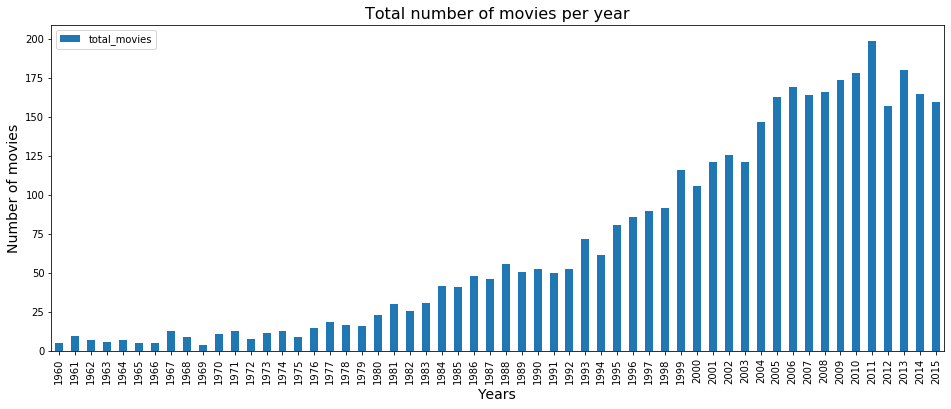

In [70]:
#In the following bar graph, the above answers can be viewed in a graphical manner.

rq1.plot(x='release_year', y='total_movies',kind='bar',figsize=(16,6));
plt.xlabel('Years', fontsize = 14);
plt.ylabel('Number of movies', fontsize = 14);
plt.title('Total number of movies per year', fontsize = 16);

>**In 2011, maximum number of movies were released whereas in 1969 lowest number of movies were released. The above graph also helps to understand the trend that the number of movies released every year has seen a gradual increase from 1960 to 2015.**

### Research Question 2  (What is the average runtime of the movies released in the year 2011?)

In [71]:
rq2 = df.query('release_year == 2011')
print('Average Runtime of movies released in 2011 is {} minutes'.format(rq2['runtime'].mean()))

Average Runtime of movies released in 2011 is 106.17085427135679 minutes


In [72]:
rq2['runtime'].describe().round(4)

count    199.0000
mean     106.1709
std       15.5846
min       62.0000
25%       95.0000
50%      105.0000
75%      114.0000
max      158.0000
Name: runtime, dtype: float64

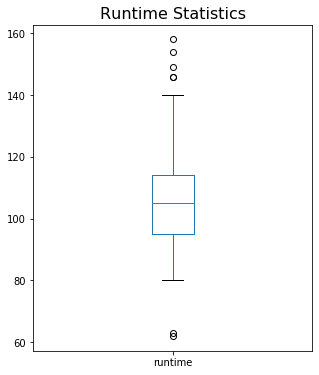

In [73]:
rq2.runtime.plot(kind='box', figsize=(5,6));
plt.title('Runtime Statistics', fontsize=16);

>**The above box plot provides a graphical representation of the minimum, maximum, mean and percentile values for the 'runtime' column.**

### Research Question 3 (What impact does the runtime of a movie have on the profits earned?)

In [74]:
rq3 = df[['id','imdb_id','original_title','budget', 'revenue','runtime']]
rq3.head()

,id,imdb_id,original_title,budget,revenue,runtime
0,135397,tt0369610,Jurassic World,150000000.0,1.513529e+09,124.0
1,76341,tt1392190,Mad Max: Fury Road,150000000.0,3.784364e+08,120.0
2,262500,tt2908446,Insurgent,110000000.0,2.952382e+08,119.0
3,140607,tt2488496,Star Wars: The Force Awakens,200000000.0,2.068178e+09,136.0
4,168259,tt2820852,Furious 7,190000000.0,1.506249e+09,137.0


In [75]:
rq3['profits'] = rq3['revenue'] - rq3['budget']

rq3.head()

C:\Users\Saheel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,imdb_id,original_title,budget,revenue,runtime,profits
0,135397,tt0369610,Jurassic World,150000000.0,1.513529e+09,124.0,1.363529e+09
1,76341,tt1392190,Mad Max: Fury Road,150000000.0,3.784364e+08,120.0,2.284364e+08
2,262500,tt2908446,Insurgent,110000000.0,2.952382e+08,119.0,1.852382e+08
3,140607,tt2488496,Star Wars: The Force Awakens,200000000.0,2.068178e+09,136.0,1.868178e+09
4,168259,tt2820852,Furious 7,190000000.0,1.506249e+09,137.0,1.316249e+09


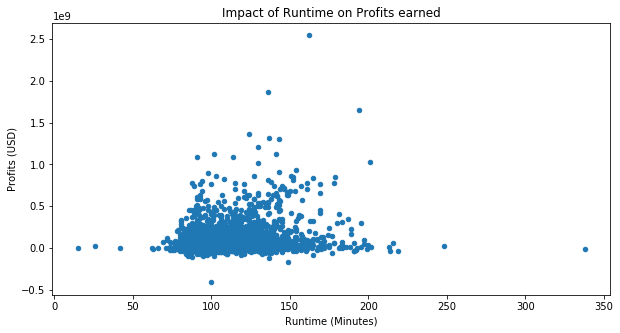

In [76]:
rq3.plot(x= 'runtime', y ='profits', kind='scatter', figsize=(10,5));
plt.ylabel('Profits (USD)')
plt.xlabel('Runtime (Minutes)')
plt.title('Impact of Runtime on Profits earned');

>**The above sactter plot represents a distribution of profits earned in erms of runtime. The plot shows that majority of the movies who made considerable amount of profit had a runtime between 100 minutes to 150 minutes.**

### Research Question 4 (Which top 5 genres have the maximum count of movies?)

In [77]:
#Storing a copy of the main dataframe
rq4 = df

In [78]:
def separate_values(column):
    a = rq4[column].str.cat(sep = '|') #Concatanating multiple data values
    a = pd.Series(a.split('|')) #Spliting data values and storing them 
    b = a.value_counts(ascending = False)  #Calculating the count for each genre to view descending order
    return b

In [79]:
c = separate_values('genres') #Calling the above function
c = c.head() #Storing first five tuples 
c

Drama        1753
Comedy       1357
Thriller     1203
Action       1085
Adventure     749
dtype: int64

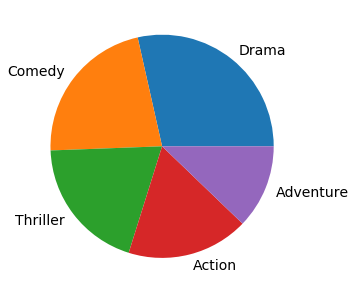

In [80]:
#Plots a pie chart for top
c.plot(kind='pie', figsize=(5,6), fontsize=14);

#Removes the Y axis None Label from Pie Chart
plt.ylabel('');

>**The above pie chart provides a pictorial representation of the five genres which are covered in maximum number of movies. 'Drama' being the most common and 'adventure' being the least common among the top five.**

### Research Question 5 (Which movie(s) directed by Steven Spielberg failed in terms of profit?)

In [81]:
#Selecting movies directed by Steven Spielberg
rq5 = df[df['director'] == 'Steven Spielberg']

In [82]:
#Calculating profits for movies directed by Steven Spielberg
rq5.insert(4,'profits',df['revenue']-df['budget'])

In [83]:
rq5 = rq5[rq5['profits']<=0]
rq5

,id,imdb_id,budget,revenue,profits,original_title,cast,director,runtime,genres,release_date,release_year
7851,11519,tt0078723,35000000.0,31755742.0,-3244258.0,1941,Dan Aykroyd|Ned Beatty|John Belushi|Lorraine G...,Steven Spielberg,113.0,Action|Comedy,1979-12-14,1979


>**Movie '1941' directed by Steven Spielberg was the only movie that didn't make any profit.**

### Research Question 6 - What is the yearly distribution of average revenue generated ?

In [84]:
rq6 = df.groupby('release_year')['revenue'].mean().reset_index(name = 'average_revenue')

In [85]:
rq6.head()

,release_year,average_revenue
0,1960,2.580100e+07
1,1961,3.377202e+07
2,1962,2.947569e+07
3,1963,2.942115e+07
4,1964,4.694479e+07


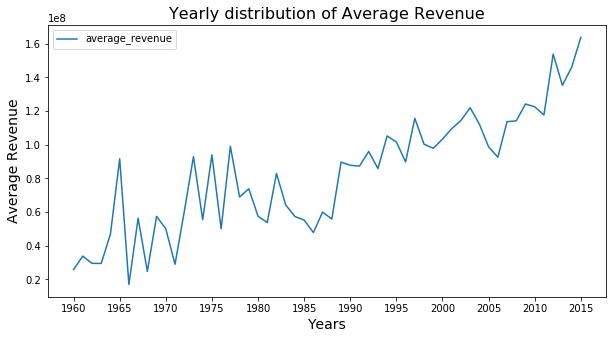

In [86]:
rq6.plot(x='release_year',y = 'average_revenue', kind='line', figsize=(10,5));
plt.xlabel('Years', fontsize=14);
plt.ylabel('Average Revenue', fontsize=14);
plt.xticks(np.arange(1960, 2020,5));
plt.title('Yearly distribution of Average Revenue', fontsize=16);

>**The above line chart helps to understand the trend, how the average revenue generated over the years has seen a gradual rise other than a few major setbacks in 1965-1975, 1985-1990 and 2005-2010.** 

<a id='conclusions'></a>

# Conclusions
The wrangled and cleaned TMDb dataset was used to perform exploratory data analysis and to create visulizations using matplotlib. The results and observations for each research question are noted below the respective question.

### Limitations of the Dataset
The data provided in the dataset isn't fully sufficient to answer some of the above questions. For, eg. calculating the total number of movies released each year; it couldn't be exact as many regional or international movies might be missing in the dataset or some of them might have been removed during data cleaning.

Furthermore, the size of the dataset could be also increased for better analysis both in terms of rows and columns. More attributes like medium of movie promotion (newspaper/visual media/social media), the movie's target audience(their descent, age) could help to analyse the profits earned in a better way.

A limitation I faced while performing the data analysis was, the dataset after the cleaning process doesn't contain that many substanial statiscal attributes. Therefore, numerical analysis gets restricted to columns like budget, revenue, runtime and release_year. 

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDbMovieDataset_SaheelSawant.ipynb'])

0